<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="https://cocl.us/corsera_da0101en_notebook_top">
         <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/Images/TopAd.png" width="750" align="center">
    </a>
</div>

<a href="https://www.bigdatauniversity.com"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/Images/CCLog.png" width = 300, align = "center"></a>

<h1 align=center><font size=5>Data Analysis with Python</font></h1>

<h1>Data processing_Pre-traitement des données</h1>

<h3>Welcome!</h3>

À la fin de ce TD, vous aurez appris les bases du Data Processing!

<h2>Table dees matières</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="#Identifier les missing value">Identifier les missing value</a>
        <ul>
            <li><a href="#Identifier les missing values">Identifier les missing value</a></li>
            <li><a href="#Gérer le problème de missing values">Gérer le problème de missing values</a></li>
            <li><a href="#Correction des formats de données">Correction des formats de données</a></li>
        </ul>
    </li>
    <li><a href="#Standardisation ou uniformisation des données">Standardisation ou uniformisation des données</a></li>
    <li><a href="#Normalisation des données">Normalisation des données (centering/scaling)</a></li>
    <li><a href="#binning">Binning</a></li>
    <li><a href="#indicateur">variable Indicateur ou muette </a></li>
</ul>

<h2>Quel est le but du Data processing?</h2>

Le Data Wrangling est le processus de conversion des données du format initial vers un format qui peut être meilleur pour l'analyse.

<h3>Import data</h3>
<p>
Vous pouvez trouver le "Le dataset automobile" à partir du lien suivant: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"> https: //archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data </a>.
Nous utiliserons cet ensemble de données tout au long de ce cours.
</p>

<h4>Import pandas</h4> 

In [2]:
import pandas as pd
import matplotlib.pylab as plt

<h2>Lire le dataset à partir d'un URL et ajouter les en-têtes associés.</h2>

In [4]:
#filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"
df = pd.read_csv(r"C:\Python_Practice\Data_Science\2_Pre_Traitement des data/auto.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [5]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [6]:
#df = pd.read_csv(filename, names = headers)
df.columns = headers

In [7]:
# Faire une affichage du dataset.
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


Comme nous pouvons le voir, plusieurs points d'interrogation sont apparus dans le dataframe; ce sont des valeurs manquantes qui peuvent entraver notre analyse.
<div> Alors, comment identifier toutes ces valeurs manquantes et les traiter? </div>


<b> Comment travailler avec des données manquantes? </b>

Étapes pour travailler avec des données manquantes:
<ol>
     <li> dentifier les données manquantes </li>
     <li> traiter les données manquantes </li>
     <li> format de données correct </li>
</ol>

In [9]:
df.tail(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


<h2 id = "Identifier_handle_missing_values"> Identifier et gérer les valeurs manquantes </h2>


<h3 id = "Identifier_missing_values"> Identifier les valeurs manquantes </h3>
<h4> Convertir "?" à NaN </h4>
Dans le dataset, les données manquantes sont accompagnées du point d'interrogation "?".
Nous remplaçons "?" avec NaN (Not a Number), qui est le marqueur de valeur manquante par défaut de Python, pour des raisons de vitesse de calcul et de commodité. Ici, nous utilisons la fonction:
  <pre> .replace (A, B, inplace = True) </pre>
remplacer A par B

In [11]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h4> Vérification données manquantes </h4>

Les valeurs manquantes sont converties à la valeur par défaut de Python. Nous utilisons les fonctions intégrées de Python pour identifier ces valeurs manquantes. Il existe deux méthodes pour détecter les données manquantes:
<ol>
     <li><b>.isnull()</b> </li>
     <li><b>.notnull()</b> </li>
</ol>
La sortie est une valeur booléenne indiquant si la valeur transmise à l'argument est en fait des données manquantes.

In [12]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" signifie valeur manquante, tandis que "False" signifie valeur non manquante.

<h4> Compter les valeurs manquantes dans chaque colonne </h4>
<p>
En utilisant une boucle for en Python, nous pouvons rapidement déterminer le nombre de valeurs manquantes dans chaque colonne. Comme mentionné ci-dessus, "True" représente une valeur manquante, "False" signifie que la valeur est présente dans l'ensemble de données. Dans le corps de la boucle for, la méthode ".value_counts ()" compte le nombre de valeurs "True".
</p>

In [13]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Sur la base du résumé ci-dessus, chaque colonne contient 205 lignes de données, sept colonnes contenant des données manquantes:
<ol>
     <li> "normalized-loss": 41 données manquantes </li>
     <li> "nombre-de-portes": 2 données manquantes </li>
     <li> "bore": 4 données manquantes </li>
     <li> "stroke": 4 données manquantes </li>
     <li> "horsepower": 2 données manquantes </li>
     <li> "peak-rpm": 2 données manquantes </li>
     <li> "prix": 4 données manquantes </li>
</ol> 

<h3 id="deal_missing_values">Deal with missing data</h3>
<b>Comment gérer les missing values?</b>

<ol>
    <li>Supprimer missing values<br>
        a. Supprimer la ligne entière<br>
        b. Supprimer la colonne entière
    </li>
    <li>Remplacer les données<br>
        a. Remplacer par la moyenne<br>
        b. Remplacer par la plus fréquente<br>
        c. Autre moyen de remplacement
    </li>
</ol>

Des colonnes entières ne doivent être supprimées que si la plupart des entrées de la colonne sont vides. Dans notre ensemble de données, aucune des colonnes n'est suffisamment vide pour être supprimée entièrement.
Nous avons une certaine liberté dans le choix de la méthode de remplacement des données; cependant, certaines méthodes peuvent sembler plus raisonnables que d'autres. Nous appliquerons chaque méthode à de nombreuses colonnes différentes:

<b> Remplacer par un moyen: </b>
<ul>
    <li> "normalized-loss": 41 données manquantes, remplacez-les par la moyenne </li>
    <li> "stroke": 4 données manquantes, remplacez-les par la moyenne </li>
    <li> "bore": 4 données manquantes, remplacez-les par la moyenne </li>
    <li> "horsepower": 2 données manquantes, remplacez-les par la moyenne </li>
    <li> "peak-rpm": 2 données manquantes, remplacez-les par la moyenne </li>
</ul>

<b> Remplacer par fréquence: </b>
<ul>
    <li> "nombre-de-portes": 2 données manquantes, remplacez-les par "quatre".
        <ul>
            <li> Raison: 84% des berlines représentent quatre portes. Étant donné que quatre portes sont les plus fréquentes, il est plus probable que cela se produise </li>
        </ul>
    </li>
</ul>

<b> Supprimez toute la ligne: </b>
<ul>
    <li> "prix": 4 données manquantes, supprimez simplement la ligne entière
        <ul>
            <li> Raison: le prix est ce que nous voulons prédire. Toute saisie de données sans données de prix ne peut pas être utilisée pour la prédiction; donc toute ligne maintenant sans données de prix ne nous est pas utile </li>
        </ul>
    </li>
</ul>

<h4>Calculer la moyenne d'une colonne </h4>

In [14]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [15]:
avg_price= df["price"].astype("float").mean(axis=0)
print('Average of price:', avg_price)

Average of price: 13207.129353233831


<h4>Remplacer "NaN" par la moyenne dans la colonne "normalized-losses"</h4>

In [16]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [17]:
df["price"].replace(np.nan, avg_price, inplace=True)

<h4>Calculer la moyenne pour la colonne 'bore'</h4>

In [18]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810957


<h4>Remplacer NaN par la moyenne</h4>

In [19]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>Selon l'exemple ci-dessus, remplacez NaN dans la colonne "stroke" par la moyenne.</b>
</div>

In [26]:
# Write your code below and press Shift+Enter to execute 
# calculate the mean vaule for "stroke" column
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

# replace NaN by mean value in "stroke" column
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

Average of stroke: 3.2554228855721337


<h4>Calculez la valeur moyenne de la colonne 'horsepower':</h4>

In [20]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


<h4>Remplacez "NaN" par la valeur moyenne:</h4>

In [28]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

<h4>Calculer la valeur moyenne de la colonne 'peak-rpm':</h4>

In [32]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


<h4>Remplacez NaN par la valeur moyenne:</h4>

In [33]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Pour voir quelles valeurs sont présentes dans une colonne particulière, nous pouvons utiliser la méthode ".value_counts ()"

In [34]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [35]:
df['stroke'].value_counts()

3.40                  20
3.23                  14
3.15                  14
3.03                  14
3.39                  13
2.64                  11
3.29                   9
3.35                   9
3.46                   8
3.58                   6
3.19                   6
3.41                   6
3.11                   6
3.07                   6
3.27                   6
3.50                   6
3.64                   5
3.52                   5
3.47                   4
3.54                   4
3.2554228855721337     4
3.86                   4
3.90                   3
2.90                   3
2.80                   2
4.17                   2
3.10                   2
2.19                   2
2.68                   2
3.08                   2
2.76                   1
2.87                   1
3.12                   1
3.16                   1
2.36                   1
2.07                   1
3.21                   1
Name: stroke, dtype: int64

Nous pouvons voir que quatre portes sont le type le plus courant. Nous pouvons également utiliser la méthode ".idxmax ()" pour calculer automatiquement pour nous le type le plus courant:

In [36]:
df['stroke'].value_counts().idxmax()

'3.40'

In [37]:
df['num-of-doors'].value_counts().idxmax()

'four'

La procédure de remplacement est très similaire à ce que nous avons vu précédemment

In [38]:
#remplacer les valeurs manquantes du «'num-of-doors'» par les valeurs les plus fréquentes
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [39]:
df['stroke'].replace(np.nan, "3.40", inplace=True)

Enfin, supprimons toutes les lignes qui n'ont pas de données de prix:

In [40]:
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [41]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<b> Bien! </b> Maintenant, nous obtenons l'ensemble de données sans valeurs manquantes.

<h3 id = "Correction des formats de données"> Correction des formats de données </h3>

<b> Nous y sommes presque! </b>
<p> La dernière étape du nettoyage des données consiste à vérifier et à s'assurer que toutes les données sont au bon format (int, float, texte ou autre). </p>

Chez Pandas, nous utilisons
<p> <b> .dtype () </b> pour vérifier le type de données </p>
<p> <b> .astype () </b> pour changer le type de données </p>

<h4>Affichons la liste des types par variable</h4>

In [42]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>Comme nous pouvons le voir ci-dessus, certaines colonnes ne sont pas du type de données correct. Les variables numériques doivent avoir le type «float» ou «int», et les variables avec des chaînes telles que les catégories doivent avoir le type «objet». Par exemple, les variables «bore» et «stroke» sont des valeurs numériques qui décrivent les moteurs, nous devrions donc nous attendre à ce qu'elles soient du type «float» ou «int»; cependant, ils sont affichés en tant que type «objet». Nous devons convertir les types de données dans un format approprié pour chaque colonne en utilisant la méthode "astype ()".</p> 

<h4>Mettre les types de données au format adéquat</h4>

In [21]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

<h4>Affichons les types après conversion</h4>

In [22]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<b> Merveilleux! </b>

Maintenant, nous obtenons enfin l'ensemble de données nettoyé sans valeurs manquantes et toutes les données dans leur format approprié.

<h2 id = "Standardisation des données"> Standardisation des données </h2>
<p>
Les données sont généralement collectées auprès de différentes agences avec différents formats.
(La normalisation des données est également un terme pour un type particulier de normalisation des données, où nous soustrayons la moyenne et la divisons par l'écart type)
</p>
    
<b> Qu'est-ce que la normalisation? </b>
<p> La normalisation est le processus de transformation des données dans un format commun qui permet au chercheur de faire une comparaison significative.
</p>

<b> Exemple </b>
<p> Transformez le mpg en L / 100 km: </p>
<p> Dans notre ensemble de données, les colonnes de consommation de carburant "city-mpg" et "Highway-mpg" sont représentées par l'unité mpg (miles par gallon). Supposons que nous développons une application dans un pays qui accepte la consommation de carburant avec la norme L / 100 km </p>
<p> Nous devrons appliquer <b> transformation de données </b> pour transformer des mpg en L / 100km? </p>

<p> La formule de conversion est : <p>
L / 100 km = 235 / mi / gal
<p> Nous pouvons effectuer de nombreuses opérations mathématiques directement dans Pandas. </p>

In [45]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [46]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [47]:
df['highway-L/100km']=235/df['highway-mpg']
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<b>Selon l'exemple ci-dessus, transformez mpg en L / 100km dans la colonne "Highway-mpg", et changez le nom de la colonne en "Highway-L / 100km".</b>
</div>

In [48]:
# Write your code below and press Shift+Enter to execute 
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,10.681818


<h2 id = "data_normalization"> Normalisation des données </h2>

<b> Pourquoi la normalisation? </b>
<p> La normalisation est le processus de transformation des valeurs de plusieurs variables dans une plage similaire. Les normalisations typiques incluent la mise à l'échelle de la variable pour que la moyenne de la variable soit de 0, la mise à l'échelle de la variable pour que la variance soit de 1, ou la mise à l'échelle de la variable pour que les valeurs de la variable varient de 0 à 1
</p>

<b> Exemple </b>
<p> Pour démontrer la normalisation, disons que nous voulons mettre à l'échelle les colonnes  "length", "width" et "height" </p>
<p> <b> Cible: </b> souhaite normaliser ces variables afin que leur valeur varie de 0 à 1. </p>
<p> <b> Approche: </b> remplacer la valeur d'origine par (valeur d'origine) / (valeur maximale) </p>

In [44]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Questiont #3: </h1>

<b>Selon l'exemple ci-dessus, normalisez la colonne "height" .</b>
</div>

In [49]:
# Write your code below and press Shift+Enter to execute 
df['height'] = df['height']/df['height'].max() 
# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,168.8,64.1,0.816054
1,168.8,64.1,0.816054
2,171.2,65.5,0.876254
3,176.6,66.2,0.908027
4,176.6,66.4,0.908027


Ici, nous pouvons voir, nous avons normalisé "length", "width" et "height" dans la plage de [0,1].

<h2 id = "binning"> Binning </h2>
<b> Pourquoi le binning? </b>
<p>
     Le binning est un processus de transformation de variables numériques continues en «bacs» catégoriels discrets, pour une analyse groupée.
</p>

<b> Exemple: </b>
<p> Dans notre jeu de données, "horsepower" est une variable réelle valorisée allant de 48 à 288, elle a 57 valeurs uniques. Et si nous ne nous soucions que de la différence de prix entre les voitures de haute puissance, de puissance moyenne et de faible puissance (3 types)? Pouvons-nous les réorganiser en trois «bacs» pour simplifier l'analyse? </p>

<p> Nous utiliserons la méthode Pandas 'cut' pour segmenter la colonne 'horsepower' en 3 bacs </p>


<h3>Exemple de binning</h3>

Convertir les données au format adéquat

In [50]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Faisons l'histogramme du "horspower" afin de voir la distribution

Text(0.5, 1.0, 'horsepower bins')

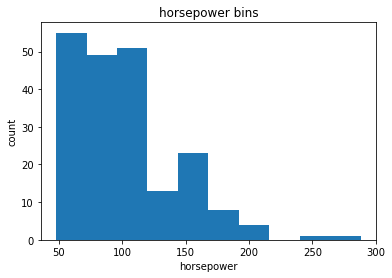

In [51]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p> Nous aimerions 3 bins de bande passante de taille égale, donc nous utilisons la fonction <code> linspace (start_value, end_value, numbers_generated </code> de numpy. </p>
<p> Puisque nous voulons inclure la valeur minimale de la puissance, nous voulons définir start_value = min (df ["horsepower"]). </p>
<p> Puisque nous voulons inclure la valeur maximale de la puissance, nous voulons définir end_value = max (df ["horsepower"]). </p>
<p> Puisque nous construisons 3 bacs de longueur égale, il devrait y avoir 4 diviseurs, donc nombres_generated = 4. </p>

In [52]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48., 128., 208., 288.])

Définir les groupe ou catégories:

In [53]:
group_names = ['Low', 'Medium', 'High']

On applique la fonction "cut" pour déterminer à quoi appartient chaque valeur de "df ['horsepower']". 

In [54]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,160,Medium


Permet de voir le nombre de véhicules dans chaque bac.

In [55]:
df["horsepower-binned"].value_counts()

Low       163
Medium     40
High        2
Name: horsepower-binned, dtype: int64

Permet de tracer la distribution de chaque bac.

Text(0.5, 1.0, 'horsepower bins')

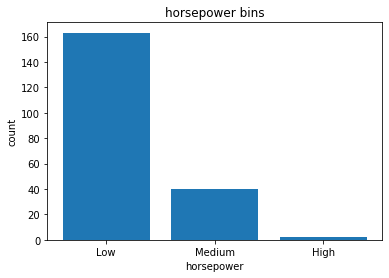

In [60]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot as pyp
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>
     Vérifiez attentivement le cadre de données ci-dessus, vous trouverez que la dernière colonne fournit les bacs pour «puissance» avec 3 catégories («faible», «moyen» et «élevé»).
</p>
<p>
     Nous avons réussi à réduire les intervalles de 57 à 3!
</p>

<h3> Visualisation des bacs </h3>
Normalement, un histogramme est utilisé pour visualiser la distribution des bacs que nous avons créés ci-dessus.

Text(0.5, 1.0, 'horsepower bins')

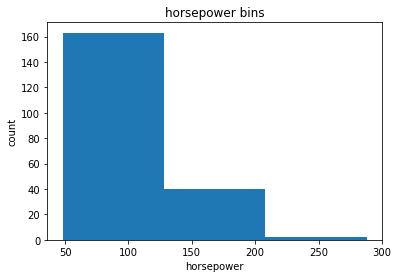

In [61]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

The plot above shows the binning result for attribute "horsepower". 

<h2 id = "indicateur"> Variable indicateur/Variable muette (ou Dummy variable) </h2>
<b> Qu'est-ce qu'une variable indicatrice? </b>
<p>
     Une variable indicatrice (ou variable fictive) est une variable numérique utilisée pour étiqueter les catégories. Ils sont appelés «mannequins» parce que les nombres eux-mêmes n'ont pas de signification inhérente.
</p>

<b> Pourquoi utilisons-nous des variables indicatrices? </b>
<p>
     Nous pouvons donc utiliser des variables catégorielles pour l'analyse de régression dans les modules ultérieurs.
</p>
<b> Exemple </b>
<p>
     Nous voyons que la colonne «type de carburant» a deux valeurs uniques, «gaz» ou «diesel». La régression ne comprend pas les mots, seulement les nombres. Pour utiliser cet attribut dans l'analyse de régression, nous convertissons le «type de carburant» en variables indicatrices.
</p>

<p>
     Nous utiliserons la méthode du panda 'get_dummies' pour attribuer des valeurs numériques à différentes catégories de type de carburant.
</p>

In [62]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

obtenir des variables d'indicateur et l'affecter à la trame de données "dummy_variable_1" 

In [73]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

KeyError: 'fuel-type'

changer les noms de colonne pour plus de clarté

In [74]:
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Nous avons maintenant la valeur 0 pour représenter «gaz» et 1 pour représenter «diesel» dans la colonne «type de carburant». Nous allons maintenant réinsérer cette colonne dans notre ensemble de données d'origine.

In [75]:
# Fusionner les data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis=1, inplace=True)

KeyError: "['fuel-type'] not found in axis"

In [76]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,diesel,gas,diesel,gas,diesel,gas,diesel,gas,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,0,1,0,1,0,1,0,1,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,0,1,0,1,0,1,0,1,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,0,1,0,1,0,1,0,1,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,0,1,0,1,0,1,0,1,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,0,1,0,1,0,1,0,1,0,1


Les deux dernières colonnes sont désormais la représentation de la variable indicatrice de la variable du type de carburant. Il s'agit désormais de 0 et de 1.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>Comme ci-dessus, créez une variable indicatrice dans la colonne "aspiration": "std" à 0, tandis que "turbo" à 1.</b>
</div>

In [78]:
# Write your code below and press Shift+Enter to execute 
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5: </h1>

<b>Fusionnez le nouveau dataframe avec le dataframe d'origine, puis déposez la colonne 'aspiration'</b>
</div>

In [79]:
# Write your code below and press Shift+Enter to execute 
#merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df" 
df.drop('aspiration', axis = 1, inplace=True)


Sauvegarder le nouveau fichier

In [80]:
df.to_csv('clean_df.csv')

<h3>About the Authors:</h3>

This notebook was written by <a href="https://www.linkedin.com/in/mahdi-noorian-58219234/" target="_blank">Mahdi Noorian PhD</a>, <a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>, Bahare Talayian, Eric Xiao, Steven Dong, Parizad, Hima Vsudevan and <a href="https://www.linkedin.com/in/fiorellawever/" target="_blank">Fiorella Wenver</a> and <a href=" https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

<p><a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a> is a Data Scientist at IBM, and holds a PhD in Electrical Engineering. His research focused on using Machine Learning, Signal Processing, and Computer Vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.</p>

<hr>
<p>Copyright &copy; 2018 IBM Developer Skills Network. This notebook and its source code are released under the terms of the <a href="https://cognitiveclass.ai/mit-license/">MIT License</a>.</p>